In [21]:
# 데이터 구성: Series, DataFrame
import pandas as pd
import numpy as np
# 데이터 시각화
import matplotlib.pyplot as plt
import seaborn as sns

# jupyter notebook 사용시 그래프 자동 출력 옵션
%matplotlib inline

# 주성분 분석
from sklearn.decomposition import PCA
import statsmodels.api as sm
# Scale 변환 -> 표준화 회귀계수 산출
from sklearn.preprocessing import StandardScaler


In [2]:
#matplotlib 패키지 한글 깨짐 처리
plt.rcParams['font.family']='NanumGothic'
plt.rc('font', family='NanumGothic')

#### 데이터 속성 및 기술통계량 확인

In [3]:
# 멤버 데이터 불러오기
df_member = pd.read_csv("jeju_member.csv", parse_dates=["gaip_date", "taltoi_date"])

In [4]:
df_member.head()

,customer_id,birth_date,gender,age,agegroup,customer_type,customer_grade,gaip_date,taltoi_date,member_month,gaip_path,flag_member,flag_rcv_sms,flag_rcv_email,flag_rcv_post,zipcode,sigun,dong,ri,address
0,C102666,1976-11-08,남,44,40대,일반,3Gold,2014-10-07,NaT,63,매장,Y,Y,Y,Y,690-170,제주시,연동,NaN,제주 제주시 연동
1,C118113,1975-08-18,여,45,40대,일반,3Gold,2011-12-06,NaT,97,기타,Y,Y,Y,Y,690-122,제주시,아라2동,NaN,제주 제주시 아라2동
2,C118133,1981-03-20,남,39,30대,일반,4Silver,2011-12-07,2014-04-02,28,매장,N,Y,Y,N,699-900,서귀포시,성산읍,NaN,제주 서귀포시 성산읍
3,C118278,1979-06-22,여,41,40대,일반,3Gold,2011-12-11,NaT,97,인터넷,Y,Y,Y,Y,695-791,제주시,애월읍,광령2리,제주 제주시 애월읍 광령2리 제주관광대학
4,C118280,1959-08-28,남,61,60대,일반,3Gold,2011-12-11,2016-05-02,53,기타,N,N,N,N,699-905,서귀포시,성산읍,삼달리,제주 서귀포시 성산읍 삼달리


In [5]:
df_member.columns

Index(['customer_id', 'birth_date', 'gender', 'age', 'agegroup',
       'customer_type', 'customer_grade', 'gaip_date', 'taltoi_date',
       'member_month', 'gaip_path', 'flag_member', 'flag_rcv_sms',
       'flag_rcv_email', 'flag_rcv_post', 'zipcode', 'sigun', 'dong', 'ri',
       'address'],
      dtype='object')

In [6]:
# join 데이터 불러오기
df_join = pd.read_csv("sales_member_join_processed.csv")

In [7]:
# 탈퇴 데이터 생성
df_taltoi = df_member[df_member["flag_member"]=="N"]

In [8]:
# 탈퇴 데이터 csv로 저장 - 나 따로 편하게 살펴볼라고
df_taltoi.to_csv("jeju_taltoi.csv")

In [9]:
# 판매 데이터 불러오기
df_sales = pd.read_csv("jeju_sales.csv")

In [10]:
# 탈퇴 데이터랑 판매 데이터를 합쳤는데
pd.merge(df_taltoi, df_sales, how='inner', on=None)

,customer_id,birth_date,gender,age,agegroup,customer_type,customer_grade,gaip_date,taltoi_date,member_month,...,purchase_time,supply_date,item_id,item_g_l,item_g_m,item_g_s,item_name,purchase_cnt,unit_cost,purchase_amt


df_taltoi 구매 기록이 없다!!

----

# 탈퇴예측 EDA

**가입 경로**

Text(0.5, 1.0, '전체회원 가입경로')

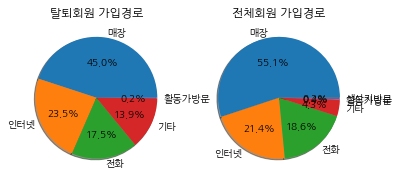

In [11]:
gaip_path_taltoi = df_taltoi['gaip_path'].value_counts()
gaip_path_member = df_member['gaip_path'].value_counts()

ax1 = plt.subplot(1,2,1)
graph1 = plt.pie(x=gaip_path_taltoi, labels=gaip_path_taltoi.index, autopct='%.1f%%', shadow=True)
plt.title("탈퇴회원 가입경로")

ax2 = plt.subplot(1,2,2)
graph2 = plt.pie(x=gaip_path_member, labels=gaip_path_member.index, autopct='%.1f%%', shadow=True)
plt.title("전체회원 가입경로")

탈퇴 회원의 가입 경로 중 가장 많은 비율은 매장 방문 가입이다\
뒤로 인터넷, 전화, 기타 순이다\

전체 회원의 가입 경로는 같은 매장, 인터넷, 전화 순이다\
비율은 다르지만 순서는 같다

**조합원 등급**

Text(0.5, 1.0, '전체회원 조합원 등급')

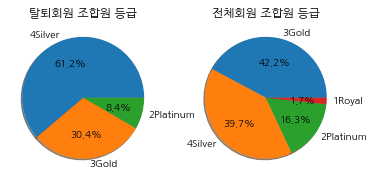

In [12]:
customer_grade_taltoi = df_taltoi['customer_grade'].value_counts()
customer_grade_member = df_member['customer_grade'].value_counts()


ax1 = plt.subplot(1,2,1)
graph1 = plt.pie(x=customer_grade_taltoi, labels=customer_grade_taltoi.index, autopct='%.1f%%', shadow=True)
plt.title("탈퇴회원 조합원 등급")


ax2 = plt.subplot(1,2,2)
graph2 = plt.pie(x=customer_grade_member, labels=customer_grade_member.index, autopct='%.1f%%', shadow=True)
plt.title("전체회원 조합원 등급")

탈퇴 회원의 조합원 등급은 Silver(61.2%), Gold(30.4%), Platinum(8.4%) 순이다

전체 회원의 조합원 등급은 Gold(42.2%), Silver(39.7%), Platinum(16.3%), Royal(1.7%)

**가입 일자 & 탈퇴 일자**

Text(0.5, 1.0, '탈퇴 일자')

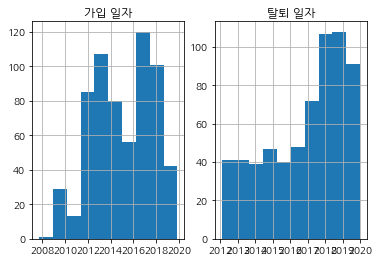

In [13]:
ax1 = plt.subplot(1,2,1)
graph1 = df_taltoi["gaip_date"].hist()
plt.rcParams["figure.figsize"] = (15,4)
plt.title("가입 일자")


ax2 = plt.subplot(1,2,2)
graph2 = df_taltoi["taltoi_date"].hist()
plt.rcParams["figure.figsize"] = (15,4)
plt.title("탈퇴 일자")


가입일자는 2013, 2017에 쌍봉ㅎㅎ 처럼 보인다\
탈퇴일자는 2018, 2019, 2020에 몰려있다

**회원 기간(월)**

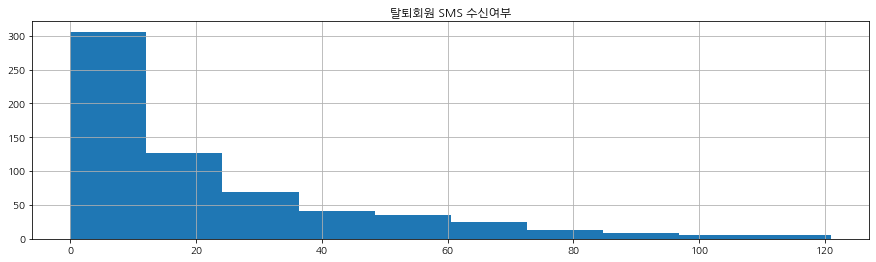

In [14]:
df_taltoi["member_month"].hist()
plt.title("탈퇴회원 SMS 수신여부")
plt.rcParams["figure.figsize"] = (6,3)

탈퇴 회원의 약 50%가 10달 이내에 탈퇴하였다

**SMS/Email/우편 수신 여부**

Text(0.5, 1.0, '전체회원 우편 수신여부')

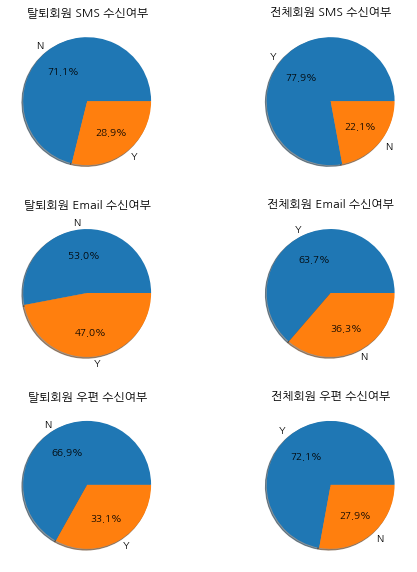

In [15]:
plt.rcParams["figure.figsize"] = (8,10)

flag_rcv_sms_taltoi = df_taltoi['flag_rcv_sms'].value_counts()
flag_rcv_sms_member = df_member['flag_rcv_sms'].value_counts()
flag_rcv_email_taltoi = df_taltoi['flag_rcv_email'].value_counts()
flag_rcv_email_member = df_member['flag_rcv_email'].value_counts()
flag_rcv_post_taltoi = df_taltoi['flag_rcv_post'].value_counts()
flag_rcv_post_member = df_member['flag_rcv_post'].value_counts()

ax1 = plt.subplot(3,2,1)
graph1 = plt.pie(x=flag_rcv_sms_taltoi, labels=flag_rcv_sms_taltoi.index, autopct='%.1f%%', shadow=True)
plt.title("탈퇴회원 SMS 수신여부")

ax2 = plt.subplot(3,2,2)
graph2 = plt.pie(x=flag_rcv_sms_member, labels=flag_rcv_sms_member.index, autopct='%.1f%%', shadow=True)
plt.title("전체회원 SMS 수신여부")

ax3 = plt.subplot(3,2,3)
graph2 = plt.pie(x=flag_rcv_email_taltoi, labels=flag_rcv_email_taltoi.index, autopct='%.1f%%', shadow=True)
plt.title("탈퇴회원 Email 수신여부")

ax4 = plt.subplot(3,2,4)
graph2 = plt.pie(x=flag_rcv_email_member, labels=flag_rcv_email_member.index, autopct='%.1f%%', shadow=True)
plt.title("전체회원 Email 수신여부")

ax5 = plt.subplot(3,2,5)
graph2 = plt.pie(x=flag_rcv_post_taltoi, labels=flag_rcv_post_taltoi.index, autopct='%.1f%%', shadow=True)
plt.title("탈퇴회원 우편 수신여부")

ax6 = plt.subplot(3,2,6)
graph2 = plt.pie(x=flag_rcv_post_member, labels=flag_rcv_post_member.index, autopct='%.1f%%', shadow=True)
plt.title("전체회원 우편 수신여부")

탈퇴회원과 전체회원의 SMS/우편 수신 여부에서 큰 차이를 보이지 않는다\
Email은 조금 많을수도?

### 탈퇴 회원 정리
- 조합원 유형은 모두 일반
- 조합원 등급은 Silver(61.2%), Gold(30.4%), Platinum(8.4%) 순 (전체 멤버는 Gold, Silver, Platinium 순)
- 가입일자는 2013, 2017년도에 가장 많고 탈퇴일자는 2018, 2019, 2020에 가장 많다
- 회원기간은 탈퇴 회원의 약 50%가 10달 이내에 탈퇴하였다
- 가입 경로는 매장, 인터넷, 전화 순 (전체 멤버와 순서 같음)
- SMS/우편 수신 여부는 큰 차이를 보이지 않으나 Email은 약간의 차이를 보인다고 말할 수 있다고 판단하였다

### 더 봐야할 점?
- 사는 지역?

------